In [1]:
import os, shutil
from os import walk, getcwd

In [2]:
# Retorna todos los archivos de un directorio dado
def ls(ruta):  
    return next(walk(ruta))[2]

height_image = 229
width_image = 229
channels_image = 3
nClasses = 4
batch_size = 64
class_mode = 'categorical'
nb_train = 4000        # 1000 x 4 clases
nb_validation = 1200   #  300 x 4 clases

base_dir = 'balanced_dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
 
def createModel(nClasses, height, width, channels):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(height,width,channels)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
#Creamos un modelo sencillo ConvNet para pocos datos
model = createModel(nClasses, height_image, width_image, channels_image )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 229, 229, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 227, 227, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 113, 113, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 113, 113, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 113, 113, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 111, 111, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 64)        0         
__________

In [5]:
#DATA AUGMENTATION
#Transformador de imágenes de forma aleatoria SOLO A TRAIN
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255,              #Normalizamos el valor de pixel
    rotation_range = 40,          #rotamos imagne 40 grados
    width_shift_range =0.2,       #aplica una fracción del ancho de la imagen orig
    height_shift_range =0.2,      #aplica una fracción del alto de la imagen orig
    shear_range = 0.2,            #aplica al azar operaciones de corte
    zoom_range = 0.2,             #aplica zoom aleatorio dentro de las imagenes
    horizontal_flip = True,       #invierte aleatoriamente la mitad de las imágenes
    fill_mode = 'nearest') 

In [6]:
#PREPROCESO
from keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing import image
import matplotlib.pyplot as plt

#train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (height_image, width_image),
    batch_size = batch_size, 
    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (height_image, width_image),
    batch_size = batch_size, 
    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (height_image, width_image),
    batch_size = batch_size,
    class_mode = 'categorical')


Found 4000 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [8]:
#Compilamos para 100 epocas con optimizador RMSProp
from keras import optimizers

epochs = 30     #4000 / (Batch_size = 64) = epocas 

model.compile(
    optimizer = 'rmsprop', 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy'])
                
history = model.fit_generator(
    train_generator, 
    steps_per_epoch = nb_train//batch_size,
    epochs = epochs, 
    verbose = 1, 
    validation_steps = nb_validation//batch_size,
    validation_data = validation_generator )
 

	

Epoch 1/30
62/62 [==============================] - 70s 1s/step - loss: 1.5215 - acc: 0.2490 - val_loss: 1.3863 - val_acc: 0.2535
Epoch 2/30
62/62 [==============================] - 68s 1s/step - loss: 1.3897 - acc: 0.2467 - val_loss: 1.3889 - val_acc: 0.2439
Epoch 3/30
62/62 [==============================] - 68s 1s/step - loss: 1.3871 - acc: 0.2399 - val_loss: 1.3863 - val_acc: 0.2491
Epoch 4/30
62/62 [==============================] - 68s 1s/step - loss: 1.4142 - acc: 0.2440 - val_loss: 1.3821 - val_acc: 0.3134
Epoch 5/30
62/62 [==============================] - 67s 1s/step - loss: 1.3645 - acc: 0.3392 - val_loss: 1.4864 - val_acc: 0.3585
Epoch 6/30
62/62 [==============================] - 66s 1s/step - loss: 1.3044 - acc: 0.3833 - val_loss: 1.2693 - val_acc: 0.4210
Epoch 7/30
62/62 [==============================] - 65s 1s/step - loss: 1.2783 - acc: 0.3954 - val_loss: 1.2488 - val_acc: 0.4418
Epoch 8/30
62/62 [==============================] - 65s 1s/step - loss: 1.2564 - acc: 0.41

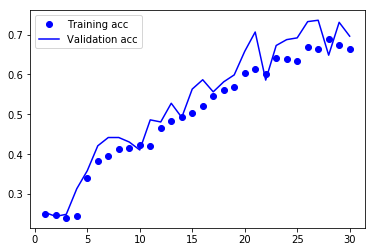

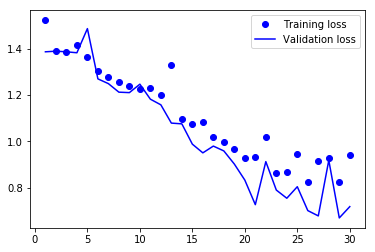

In [9]:
#Mostramos graficos 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+ 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
#plt.tittle('Trainning and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
#plt.tittle('Trainning and validation loss')
plt.legend()

plt.show()

In [10]:
model.evaluate_generator(test_generator)

[0.7144767196973165, 0.6975000007947286]

In [11]:
model.save('ConvNet_RMSprop_2.h5')

In [12]:
#Entrenamos el mismo modelo con optimizador SDG, momentum y nesterov

#Compilamos para 100 epocas con optimizador RMSProp
from keras import optimizers
epochs = 30

model.compile(
    optimizer = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
    loss ='categorical_crossentropy',
    metrics = ['acc'])
                
history = model.fit_generator(
    train_generator, 
    steps_per_epoch = nb_train//batch_size,
    epochs = epochs, 
    verbose = 1, 
    validation_steps = nb_validation//batch_size,
    validation_data = validation_generator )


Epoch 1/30
62/62 [==============================] - 70s 1s/step - loss: 11.7127 - acc: 0.2596 - val_loss: 12.0326 - val_acc: 0.2535
Epoch 2/30
62/62 [==============================] - 69s 1s/step - loss: 12.0926 - acc: 0.2497 - val_loss: 12.0326 - val_acc: 0.2535
Epoch 3/30
62/62 [==============================] - 68s 1s/step - loss: 12.0641 - acc: 0.2515 - val_loss: 12.0326 - val_acc: 0.2535
Epoch 4/30
62/62 [==============================] - 68s 1s/step - loss: 12.1169 - acc: 0.2482 - val_loss: 12.0326 - val_acc: 0.2535
Epoch 5/30
62/62 [==============================] - 67s 1s/step - loss: 12.0562 - acc: 0.2520 - val_loss: 12.0326 - val_acc: 0.2535
Epoch 6/30
62/62 [==============================] - 66s 1s/step - loss: 12.0845 - acc: 0.2503 - val_loss: 12.0326 - val_acc: 0.2535
Epoch 7/30
62/62 [==============================] - 65s 1s/step - loss: 12.1293 - acc: 0.2475 - val_loss: 12.0326 - val_acc: 0.2535
Epoch 8/30
62/62 [==============================] - 65s 1s/step - loss: 11.9

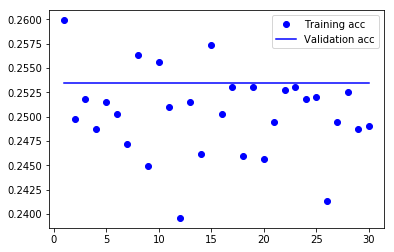

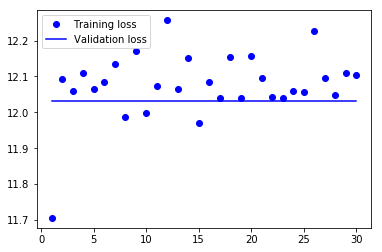

In [13]:
#Mostramos otro tipo de grafico
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+ 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
#plt.tittle('Trainning and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
#plt.tittle('Trainning and validation loss')
plt.legend()

plt.show()

In [14]:
model.evaluate_generator(test_generator)

[12.088571675618489, 0.2500000003973643]

In [15]:
model.save('ConvNet_SDG_2.h5')